<a href="https://colab.research.google.com/github/TanisqSinghal/Data_science_internship/blob/main/Lecture9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.DataFrame({
    "Country" : ["France", "Spain", "Germany", "Spain", "Germany", "France", "Spain", "France", "Germany", "France", "Spain"],
    "AGE" : [84.0, 27.0, 30.0, 38.0, 40.0, 35.0 , np.nan, 48.0, 50.0, 37.0, np.nan],
    "Salary" : [72000.0, 48000.0, 54000.0, 61000.0, np.nan, 58000.0, 52000.0, 79000.0, 83000.0, 67000.0, '-'],
    "Purchased" : ["No", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No"]
})
df

,Country,AGE,Salary,Purchased
0,France,84.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


#Data-preprocessing using matplotlib,seaborn,python,pandas

In [ ]:
df.shape

(11, 4)

In [ ]:
df.dtypes

,0
Country,object
AGE,float64
Salary,object
Purchased,object


In [ ]:
df.isnull().sum()

,0
Country,0
AGE,2
Salary,1
Purchased,0


In [ ]:
for i in df.columns:
  print(df[i].unique())

['France' 'Spain' 'Germany']
[84. 27. 30. 38. 40. 35. nan 48. 50. 37.]
[72000.0 48000.0 54000.0 61000.0 nan 58000.0 52000.0 79000.0 83000.0
 67000.0 '-']
['No' 'Yes']


In [ ]:
df.AGE.fillna(method='ffill', inplace=True)
df

,Country,AGE,Salary,Purchased
0,France,84.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,35.0,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
df.isnull().sum()

,0
Country,0
AGE,0
Salary,1
Purchased,0


In [ ]:
df.Salary = df.Salary.replace('-','53666.666666666664')

In [ ]:
df[df.Country == "Spain"].Salary[0:3].mean()

np.float64(53666.666666666664)

In [ ]:
df.Salary = df.Salary.replace('53666.666666666664',53666.666666666664)

In [ ]:
df

,Country,AGE,Salary,Purchased
0,France,84.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.000000,Yes
6,Spain,35.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [ ]:
df.Salary.fillna(df.Salary.mean(), inplace=True)
df

,Country,AGE,Salary,Purchased
0,France,84.0,72000.000000,No
1,Spain,27.0,48000.000000,Yes
2,Germany,30.0,54000.000000,No
3,Spain,38.0,61000.000000,No
4,Germany,40.0,62766.666667,Yes
5,France,35.0,58000.000000,Yes
6,Spain,35.0,52000.000000,No
7,France,48.0,79000.000000,Yes
8,Germany,50.0,83000.000000,No
9,France,37.0,67000.000000,Yes


In [ ]:
df.describe()

,AGE,Salary
count,11.000000,11.000000
mean,41.909091,62766.666667
std,15.494867,11382.296195
min,27.000000,48000.000000
25%,35.000000,53833.333333
50%,37.000000,61000.000000
75%,44.000000,69500.000000
max,84.000000,83000.000000


In [ ]:
df.dtypes

,0
Country,object
AGE,float64
Salary,float64
Purchased,object


In [ ]:
df.Salary.astype('int')

,Salary
0,72000
1,48000
2,54000
3,61000
4,62766
5,58000
6,52000
7,79000
8,83000
9,67000


In [ ]:
X = df.iloc[0:,:3]
X

,Country,AGE,Salary
0,France,84.0,72000.000000
1,Spain,27.0,48000.000000
2,Germany,30.0,54000.000000
3,Spain,38.0,61000.000000
4,Germany,40.0,62766.666667
5,France,35.0,58000.000000
6,Spain,35.0,52000.000000
7,France,48.0,79000.000000
8,Germany,50.0,83000.000000
9,France,37.0,67000.000000


In [ ]:
Y = df.Purchased
Y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


<Axes: ylabel='AGE'>

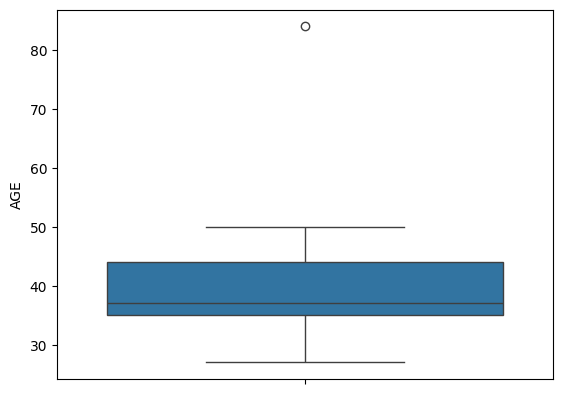

In [ ]:
sns.boxplot(y='AGE', data=df)

<Axes: ylabel='Salary'>

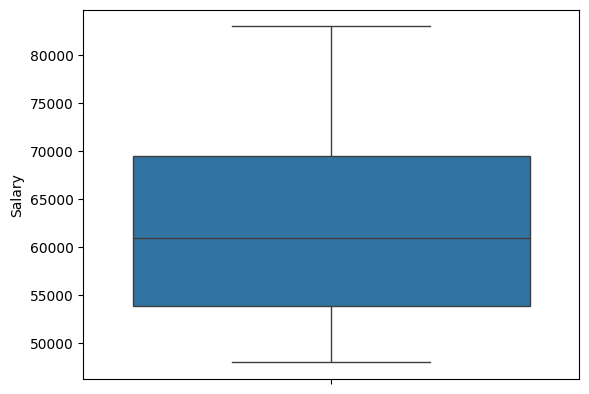

In [ ]:
sns.boxplot(y='Salary', data=df)

In [ ]:
num_df = df[['AGE', 'Salary']]
num_df

,AGE,Salary
0,84.0,72000.000000
1,27.0,48000.000000
2,30.0,54000.000000
3,38.0,61000.000000
4,40.0,62766.666667
5,35.0,58000.000000
6,35.0,52000.000000
7,48.0,79000.000000
8,50.0,83000.000000
9,37.0,67000.000000


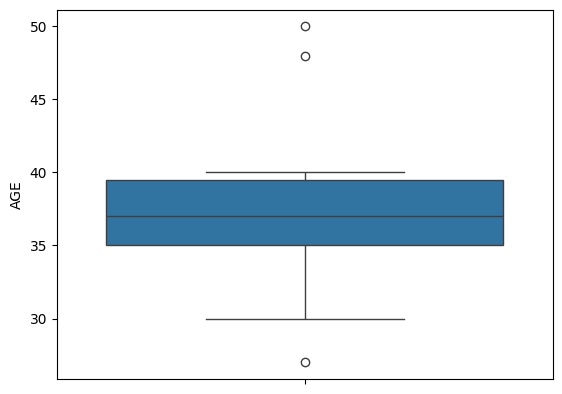

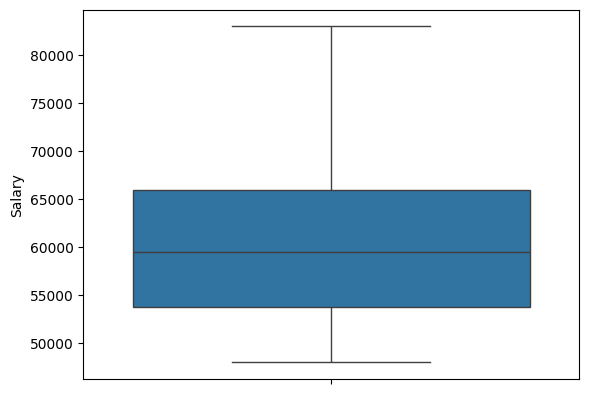

In [ ]:
for c in num_df.columns:
  percentile25 = num_df[c].quantile(0.25)
  percentile75 = num_df[c].quantile(0.75)
  iqr = percentile75-percentile25
  uper_limit = percentile75 + (1.5 * iqr)
  lower_limit = percentile25 - (1.5 * iqr)
  num_df = num_df[num_df[c]<uper_limit]
  num_df = num_df[num_df[c]>lower_limit]
  plt.figure()
  sns.boxplot(y=c, data=num_df)

In [ ]:
p_25 = num_df['AGE'].quantile(0.25)
p_25
num_df

,AGE,Salary
1,27.0,48000.000000
2,30.0,54000.000000
3,38.0,61000.000000
4,40.0,62766.666667
5,35.0,58000.000000
6,35.0,52000.000000
7,48.0,79000.000000
8,50.0,83000.000000
9,37.0,67000.000000
10,37.0,53666.666667


In [ ]:
num_df.corr()

,AGE,Salary
AGE,1.000000,0.931203
Salary,0.931203,1.000000


<Axes: >

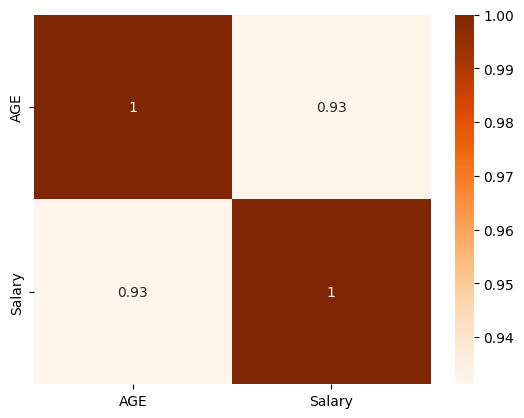

In [ ]:
sns.heatmap(num_df.corr(), annot=True, cmap='Oranges')

#Data-preprocessing using sklearn

In [ ]:
my_df = pd.DataFrame({
    "Country" : ["France", "Spain", "Germany", "Spain", "Germany", "France", "Spain", "France", "Germany", "France"],
    "AGE" : [84.0, 27.0, 30.0, 38.0, 40.0, 35.0 , np.nan, 48.0, 50.0, 37.0],
    "Salary" : [72000.0, 48000.0, 54000.0, 61000.0, np.nan, 58000.0, 52000.0, 79000.0, 83000.0, 67000.0],
    "Purchased" : ["No", "Yes", "No", "No", "Yes", "Yes", "No", "Yes", "No", "Yes"]
})
my_df

,Country,AGE,Salary,Purchased
0,France,84.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
x = my_df.iloc[:, :-1].values #independent
y = my_df.iloc[:, -1].values #dependent

In [ ]:
x,y

(array([['France', 84.0, 72000.0],
        ['Spain', 27.0, 48000.0],
        ['Germany', 30.0, 54000.0],
        ['Spain', 38.0, 61000.0],
        ['Germany', 40.0, nan],
        ['France', 35.0, 58000.0],
        ['Spain', nan, 52000.0],
        ['France', 48.0, 79000.0],
        ['Germany', 50.0, 83000.0],
        ['France', 37.0, 67000.0]], dtype=object),
 array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
       dtype=object))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:,1:3])
x

array([['France', 84.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 43.22222222222222, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

#ColumnTransformer(One hot encoder)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])],remainder='passthrough')
X=np.array(ct.fit_transform(x))
X

array([[1.0, 0.0, 0.0, 84.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 43.22222222222222, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

#One hot encoder using Pandas

In [ ]:
pd.get_dummies(my_df.iloc[:, :-1], dtype='int')

,AGE,Salary,Country_France,Country_Germany,Country_Spain
0,84.0,72000.0,1,0,0
1,27.0,48000.0,0,0,1
2,30.0,54000.0,0,1,0
3,38.0,61000.0,0,0,1
4,40.0,NaN,0,1,0
5,35.0,58000.0,1,0,0
6,NaN,52000.0,0,0,1
7,48.0,79000.0,1,0,0
8,50.0,83000.0,0,1,0
9,37.0,67000.0,1,0,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

#Dividing values for training and testing

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1)
print(X_train)
print("-------------")
print(X)
print("-------------")
print(y_train)
print("-------------")
print(y_test)

[[0.0 0.0 1.0 43.22222222222222 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 84.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
-------------
[[1.0 0.0 0.0 84.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 43.22222222222222 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
-------------
[0 1 0 0 1 1 0 1]
-------------
[0 1]


#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
X_test[:, 3:] = mm.transform(X_test[:, 3:])

In [ ]:
print(X_train[:, 3:])
print(X_test[:, 3:])

[[0.2846003898635477 0.11428571428571432]
 [0.22807017543859648 0.45079365079365075]
 [1.0 0.6857142857142855]
 [0.19298245614035087 0.37142857142857144]
 [0.0 0.0]
 [0.3684210526315789 0.8857142857142857]
 [0.40350877192982454 1.0]
 [0.1403508771929824 0.2857142857142856]]
[[0.05263157894736842 0.17142857142857149]
 [0.17543859649122812 0.5428571428571427]]


#Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sta = StandardScaler()
X_train[:, 3:] = sta.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sta.transform(X_test[:, 3:])
print(X_train[:, 3:])

[[-0.15173380619625246 -1.0781259408412427]
 [-0.3528894806964267 -0.07013167641635429]
 [2.393925936616301 0.6335624327104543]
 [-0.47774472693791437 -0.3078661727429787]
 [-1.164448581266096 -1.4204636155515824]
 [0.14653150426952366 1.2326533634535488]
 [0.2713867505110113 1.5749910381638885]
 [-0.665027596300146 -0.5646194287757338]]


#Practice

In [ ]:
practice_df = pd.read_csv("/content/tanishak.txt", delimiter="|")
practice_df

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [ ]:
practice_df.isnull().sum()

,0
user_id,0
age,0
gender,0
occupation,0
zip_code,0


In [ ]:
practice_df.dtypes

,0
user_id,int64
age,int64
gender,object
occupation,object
zip_code,object


In [ ]:
X1 = practice_df.iloc[0:, 1]
X1

,age
0,24
1,53
2,23
3,24
4,33
...,...
938,26
939,32
940,20
941,48


<Axes: ylabel='age'>

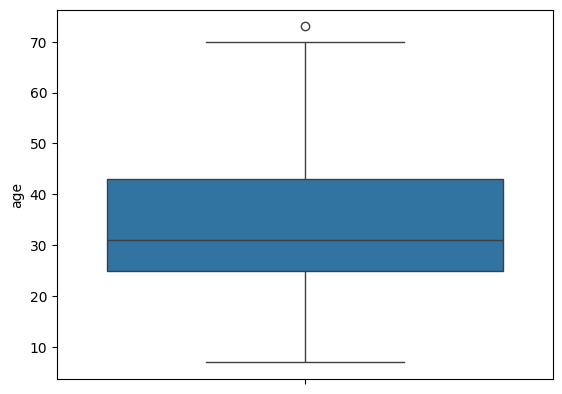

In [ ]:
sns.boxplot(y=X1, data=practice_df)